In [1]:
# Check for GPU presence
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
# Downloading fashion Mnist dataset and dividing it into train and test sets.
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [8]:
# Data Analysis
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [9]:
# Finding the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

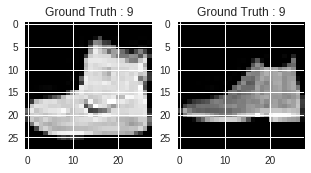

In [10]:
# Image Viz
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

# **`Data Preprocessing`**

In [11]:
# Converting each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# The data right now is in an int8 format, so before we feed it into the network we need to convert its type to float32, 
# and we also have to rescale the pixel values in range (0 - 1) inclusive. 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [13]:
# Converting the class labels into a one-hot encoding vector.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
# Performing train/test split

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.3, random_state=42)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

# **The Network**

In [16]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [18]:
batch_size = 64
epochs = 30
num_classes = 10

### Without Dropout Layers

In [19]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))  

fashion_model.add(Dense(num_classes, activation='softmax'))

In [20]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [22]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 16s 376us/step - loss: 0.5051 - acc: 0.8141 - val_loss: 0.3522 - val_acc: 0.8740
Epoch 2/30
42000/42000 [==============================] - 15s 347us/step - loss: 0.3004 - acc: 0.8890 - val_loss: 0.2720 - val_acc: 0.8996
Epoch 3/30
 2368/42000 [>.............................] - ETA: 12s - loss: 0.2493 - acc: 0.9143

42000/42000 [==============================] - 15s 346us/step - loss: 0.2497 - acc: 0.9086 - val_loss: 0.3187 - val_acc: 0.8751
Epoch 4/30
42000/42000 [==============================] - 15s 345us/step - loss: 0.2208 - acc: 0.9168 - val_loss: 0.2329 - val_acc: 0.9144
Epoch 5/30
17664/42000 [===========>..................] - ETA: 7s - loss: 0.1880 - acc: 0.9283

42000/42000 [==============================] - 15s 346us/step - loss: 0.1908 - acc: 0.9279 - val_loss: 0.2586 - val_acc: 0.9108
Epoch 6/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.1692 - acc: 0.9356 - val_loss: 0.2432 - val_acc: 0.9141
Epoch 7/30
21184/42000 [==============>...............] - ETA: 6s - loss: 0.1385 - acc: 0.9499

42000/42000 [==============================] - 15s 347us/step - loss: 0.1453 - acc: 0.9465 - val_loss: 0.2406 - val_acc: 0.9195
Epoch 8/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.1257 - acc: 0.9523 - val_loss: 0.2467 - val_acc: 0.9196
Epoch 9/30
21888/42000 [==============>...............] - ETA: 6s - loss: 0.1009 - acc: 0.9622

42000/42000 [==============================] - 15s 346us/step - loss: 0.1070 - acc: 0.9595 - val_loss: 0.2454 - val_acc: 0.9167
Epoch 10/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0917 - acc: 0.9654 - val_loss: 0.2666 - val_acc: 0.9198
Epoch 11/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0736 - acc: 0.9712

42000/42000 [==============================] - 15s 347us/step - loss: 0.0804 - acc: 0.9686 - val_loss: 0.2906 - val_acc: 0.9234
Epoch 12/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0687 - acc: 0.9733 - val_loss: 0.3146 - val_acc: 0.9176
Epoch 13/30
21760/42000 [==============>...............] - ETA: 6s - loss: 0.0527 - acc: 0.9795

42000/42000 [==============================] - 15s 346us/step - loss: 0.0643 - acc: 0.9758 - val_loss: 0.3243 - val_acc: 0.9212
Epoch 14/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0533 - acc: 0.9793 - val_loss: 0.3279 - val_acc: 0.9193
Epoch 15/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0376 - acc: 0.9865

42000/42000 [==============================] - 15s 345us/step - loss: 0.0447 - acc: 0.9835 - val_loss: 0.3425 - val_acc: 0.9190
Epoch 16/30
42000/42000 [==============================] - 14s 345us/step - loss: 0.0446 - acc: 0.9834 - val_loss: 0.3930 - val_acc: 0.9128
Epoch 17/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0404 - acc: 0.9848

42000/42000 [==============================] - 15s 347us/step - loss: 0.0416 - acc: 0.9847 - val_loss: 0.3863 - val_acc: 0.9176
Epoch 18/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0403 - acc: 0.9857 - val_loss: 0.4102 - val_acc: 0.9179
Epoch 19/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0261 - acc: 0.9903

42000/42000 [==============================] - 15s 345us/step - loss: 0.0305 - acc: 0.9887 - val_loss: 0.4193 - val_acc: 0.9153
Epoch 20/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0335 - acc: 0.9879 - val_loss: 0.4230 - val_acc: 0.9179
Epoch 21/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0323 - acc: 0.9884

42000/42000 [==============================] - 15s 346us/step - loss: 0.0378 - acc: 0.9864 - val_loss: 0.4127 - val_acc: 0.9172
Epoch 22/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0267 - acc: 0.9904 - val_loss: 0.4011 - val_acc: 0.9194
Epoch 23/30
21760/42000 [==============>...............] - ETA: 6s - loss: 0.0247 - acc: 0.9909

42000/42000 [==============================] - 15s 345us/step - loss: 0.0279 - acc: 0.9899 - val_loss: 0.4623 - val_acc: 0.9188
Epoch 24/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0226 - acc: 0.9923 - val_loss: 0.4715 - val_acc: 0.9181
Epoch 25/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0219 - acc: 0.9925

42000/42000 [==============================] - 15s 346us/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.4421 - val_acc: 0.9187
Epoch 26/30
42000/42000 [==============================] - 15s 345us/step - loss: 0.0252 - acc: 0.9912 - val_loss: 0.4707 - val_acc: 0.9163
Epoch 27/30
21760/42000 [==============>...............] - ETA: 6s - loss: 0.0182 - acc: 0.9940

42000/42000 [==============================] - 14s 345us/step - loss: 0.0241 - acc: 0.9918 - val_loss: 0.4846 - val_acc: 0.9119
Epoch 28/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0270 - acc: 0.9906 - val_loss: 0.5198 - val_acc: 0.9181
Epoch 29/30
21952/42000 [==============>...............] - ETA: 6s - loss: 0.0264 - acc: 0.9906

42000/42000 [==============================] - 15s 346us/step - loss: 0.0252 - acc: 0.9912 - val_loss: 0.5235 - val_acc: 0.9205
Epoch 30/30
42000/42000 [==============================] - 15s 346us/step - loss: 0.0215 - acc: 0.9922 - val_loss: 0.4956 - val_acc: 0.9191


In [23]:
# Model Evaluation on the Test Set
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5738951678013895
Test accuracy: 0.9137


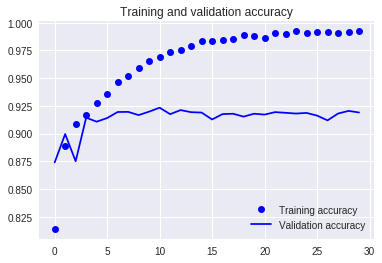

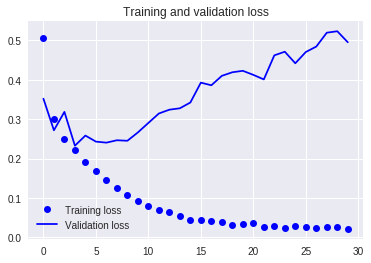

In [24]:
# Plotting the accuracy and loss plots between training and validation data:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### With Dropout Layers (To prevent overfitting)

In [40]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))

fashion_model.add(Dense(num_classes, activation='softmax'))

In [41]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
__________

In [42]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [44]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=30,verbose=1,validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 17s 406us/step - loss: 0.6042 - acc: 0.7744 - val_loss: 0.4025 - val_acc: 0.8485
Epoch 2/30
42000/42000 [==============================] - 17s 398us/step - loss: 0.3900 - acc: 0.8545 - val_loss: 0.3077 - val_acc: 0.8864
Epoch 3/30
  256/42000 [..............................] - ETA: 14s - loss: 0.3389 - acc: 0.8984

42000/42000 [==============================] - 17s 393us/step - loss: 0.3356 - acc: 0.8738 - val_loss: 0.2805 - val_acc: 0.8943
Epoch 4/30
42000/42000 [==============================] - 16s 391us/step - loss: 0.3063 - acc: 0.8855 - val_loss: 0.2737 - val_acc: 0.8989
Epoch 5/30
13504/42000 [========>.....................] - ETA: 9s - loss: 0.2931 - acc: 0.8904

42000/42000 [==============================] - 16s 386us/step - loss: 0.2897 - acc: 0.8919 - val_loss: 0.2479 - val_acc: 0.9046
Epoch 6/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.2691 - acc: 0.8972 - val_loss: 0.2702 - val_acc: 0.9002
Epoch 7/30
15424/42000 [==========>...................] - ETA: 9s - loss: 0.2626 - acc: 0.9028

42000/42000 [==============================] - 16s 388us/step - loss: 0.2619 - acc: 0.9031 - val_loss: 0.2414 - val_acc: 0.9112
Epoch 8/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.2453 - acc: 0.9070 - val_loss: 0.2340 - val_acc: 0.9147
Epoch 9/30
14656/42000 [=========>....................] - ETA: 9s - loss: 0.2331 - acc: 0.9128

42000/42000 [==============================] - 16s 388us/step - loss: 0.2353 - acc: 0.9119 - val_loss: 0.2296 - val_acc: 0.9166
Epoch 10/30
42000/42000 [==============================] - 16s 386us/step - loss: 0.2311 - acc: 0.9116 - val_loss: 0.2169 - val_acc: 0.9211
Epoch 11/30
16320/42000 [==========>...................] - ETA: 8s - loss: 0.2179 - acc: 0.9159

42000/42000 [==============================] - 16s 387us/step - loss: 0.2245 - acc: 0.9150 - val_loss: 0.2117 - val_acc: 0.9229
Epoch 12/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.2151 - acc: 0.9191 - val_loss: 0.2265 - val_acc: 0.9156
Epoch 13/30
17152/42000 [===========>..................] - ETA: 8s - loss: 0.2089 - acc: 0.9220

42000/42000 [==============================] - 16s 386us/step - loss: 0.2127 - acc: 0.9195 - val_loss: 0.2079 - val_acc: 0.9248
Epoch 14/30
42000/42000 [==============================] - 16s 386us/step - loss: 0.2036 - acc: 0.9230 - val_loss: 0.2103 - val_acc: 0.9211
Epoch 15/30
16704/42000 [==========>...................] - ETA: 8s - loss: 0.1992 - acc: 0.9239

42000/42000 [==============================] - 16s 384us/step - loss: 0.2023 - acc: 0.9223 - val_loss: 0.2131 - val_acc: 0.9231
Epoch 16/30
42000/42000 [==============================] - 16s 384us/step - loss: 0.1963 - acc: 0.9255 - val_loss: 0.2030 - val_acc: 0.9246
Epoch 17/30
16064/42000 [==========>...................] - ETA: 9s - loss: 0.1925 - acc: 0.9264

42000/42000 [==============================] - 16s 387us/step - loss: 0.1950 - acc: 0.9253 - val_loss: 0.2041 - val_acc: 0.9267
Epoch 18/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.1918 - acc: 0.9275 - val_loss: 0.2118 - val_acc: 0.9241
Epoch 19/30
16064/42000 [==========>...................] - ETA: 9s - loss: 0.1893 - acc: 0.9263

42000/42000 [==============================] - 16s 387us/step - loss: 0.1870 - acc: 0.9285 - val_loss: 0.2122 - val_acc: 0.9252
Epoch 20/30
42000/42000 [==============================] - 16s 388us/step - loss: 0.1877 - acc: 0.9284 - val_loss: 0.2117 - val_acc: 0.9243
Epoch 21/30
16192/42000 [==========>...................] - ETA: 8s - loss: 0.1776 - acc: 0.9326

42000/42000 [==============================] - 16s 387us/step - loss: 0.1793 - acc: 0.9318 - val_loss: 0.2103 - val_acc: 0.9265
Epoch 22/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.1790 - acc: 0.9315 - val_loss: 0.2167 - val_acc: 0.9247
Epoch 23/30


42000/42000 [==============================] - 16s 387us/step - loss: 0.1763 - acc: 0.9322 - val_loss: 0.2190 - val_acc: 0.9244
Epoch 24/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.1724 - acc: 0.9334 - val_loss: 0.2066 - val_acc: 0.9283
Epoch 25/30
15744/42000 [==========>...................] - ETA: 9s - loss: 0.1630 - acc: 0.9360

42000/42000 [==============================] - 16s 386us/step - loss: 0.1727 - acc: 0.9337 - val_loss: 0.2147 - val_acc: 0.9266
Epoch 26/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.1713 - acc: 0.9343 - val_loss: 0.2094 - val_acc: 0.9266
Epoch 27/30
15424/42000 [==========>...................]

42000/42000 [==============================] - 16s 387us/step - loss: 0.1695 - acc: 0.9358 - val_loss: 0.2126 - val_acc: 0.9272
Epoch 28/30
42000/42000 [==============================] - 16s 386us/step - loss: 0.1705 - acc: 0.9344 - val_loss: 0.1989 - val_acc: 0.9302
Epoch 29/30
16128/42000 [==========>...................] - ETA: 8s - loss: 0.1596 - acc: 0.9394

42000/42000 [==============================] - 16s 386us/step - loss: 0.1632 - acc: 0.9381 - val_loss: 0.2108 - val_acc: 0.9302
Epoch 30/30
42000/42000 [==============================] - 16s 387us/step - loss: 0.1627 - acc: 0.9384 - val_loss: 0.2096 - val_acc: 0.9292


In [45]:
# Save the model
fashion_model.save("fashion_model_dropout.h5py")

In [46]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 139us/step
Test loss: 0.24352196671068668
Test accuracy: 0.9182


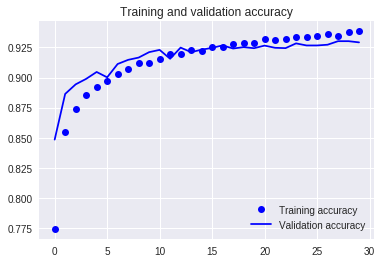

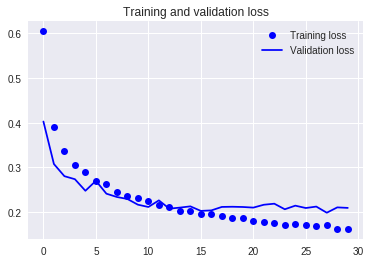

In [47]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9162 correct labels


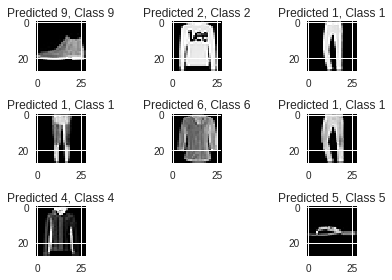

In [52]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 838 incorrect labels


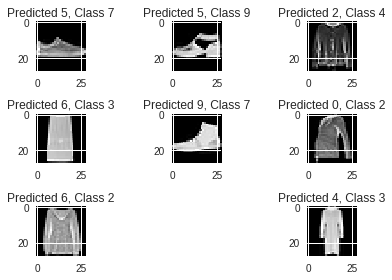

In [53]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

## Classification Report

In [54]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.80      0.88      0.84      1000
    Class 1       1.00      0.98      0.99      1000
    Class 2       0.90      0.84      0.87      1000
    Class 3       0.91      0.92      0.92      1000
    Class 4       0.85      0.89      0.87      1000
    Class 5       0.99      0.98      0.98      1000
    Class 6       0.80      0.74      0.77      1000
    Class 7       0.96      0.97      0.97      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.97      0.97      0.97      1000

avg / total       0.92      0.92      0.92     10000

